# Real Estate Analysis

About The Data Set:


                id:id

                Lng: Longitute

                Lat:Latitute

                totalPrice: the total price

                price: the average price by square

                square: the square of house

                livingRoom: the number of living room

                drawingRoom: the number of drawing room

                kitchen: the number of kitchen

                bathroom: the number of bathroom

                floor: the height of the house.

                buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).

                constructionTime: the time of construction

                renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )

                buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel(5) 
                and steel-concrete composite (6).

                ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder.
                It describes how many ladders a resident have on average.

                elevator: elevator have ( 1 ) or not have elevator( 0 )

                fiveYearsProperty: if the owner have the property for less than 5 years

                subway: (1) near to subway,(0) not near to subway

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Loading The Data

In [2]:
df=pd.read_csv("BDAdata.csv")
df.head()

C:\Users\utkar\AppData\Local\Temp\ipykernel_14256\3108978380.py:1: DtypeWarning: Columns (0,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("BDAdata.csv")


,id,Lng,Lat,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district
0,101084782030,116.475489,40.019520,415.0,31680,131.00,2,1,1,1,26.0,1.0,2005,3,6,0.217,1.0,0.0,1.0,7
1,101086012217,116.453917,39.881534,575.0,43436,132.38,2,2,1,2,22.0,1.0,2004,4,6,0.667,1.0,1.0,0.0,7
2,101086041636,116.561978,39.877145,1030.0,52021,198.00,3,2,1,3,4.0,4.0,2005,3,6,0.500,1.0,0.0,0.0,7
3,101086406841,116.438010,40.076114,297.5,22202,134.00,3,1,1,1,21.0,1.0,2008,1,6,0.273,1.0,0.0,0.0,6
4,101086920653,116.428392,39.886229,392.0,48396,81.00,2,1,1,1,6.0,4.0,1960,2,2,0.333,0.0,1.0,1.0,1


In [3]:
df.shape

(318851, 20)

# Central Limit Theorem

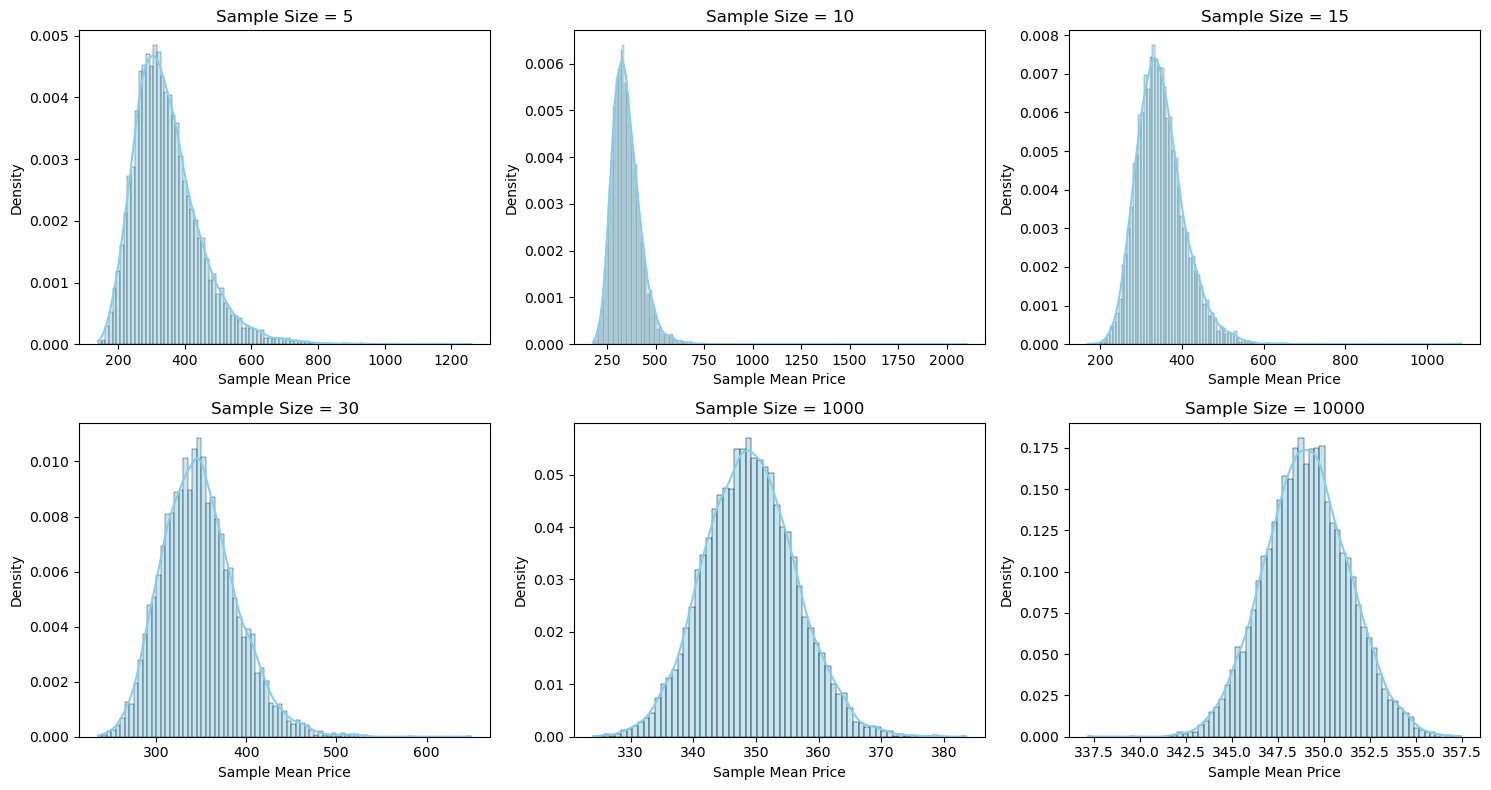

In [4]:
price_data = df["totalPrice"].values
num_samples = 10000
sample_sizes = [5,10,15, 30, 1000, 10000]

plt.figure(figsize=(15, 8))

for i, size in enumerate(sample_sizes):
    means = [np.mean(np.random.choice(price_data, size=size, replace=True)) for _ in range(num_samples)]
    
    plt.subplot(2, 3, i+1)
    sns.histplot(means, kde=True, color='skyblue', stat='density')
    
    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean Price')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [5]:
np.mean(df['totalPrice'])

349.0302006266249

# Hypothesis testing : t test

In [6]:
from scipy.stats import ttest_1samp

price_data = df["price"].values

hypothetical_mean = np.mean(df["price"])

t_statistic, p_value = ttest_1samp(price_data, popmean=hypothetical_mean)

print("t-statistic:", t_statistic)
print("p-value:",p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The average price is significantly different from $50000.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average price.")

t-statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis: There is no significant difference in average price.


In [7]:
hypothetical_mean = 40000

t_statistic, p_value = ttest_1samp(price_data, popmean=hypothetical_mean)

print("t-statistic:", t_statistic)
print("p-value:",p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The average price is significantly different from $50000.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average price.")

t-statistic: 91.82944901128002
p-value: 0.0
Reject the null hypothesis: The average price is significantly different from $50000.


# Data Transformation

In [8]:
df["Lng"] = df["Lng"].round(2)
df["Lat"] = df["Lat"].round(2)

In [9]:
column_mapping = {
    "Lng": "L",
    "Lat": "La",
    "totalPrice": "TP",
    "price": "P",
    "square": "S",
    "livingRoom": "LR",
    "drawingRoom": "DR",
    "kitchen": "K",
    "bathRoom": "BR",
    "floor": "F",
    "buildingType": "BT",
    "constructionTime": "CT",
    "renovationCondition": "RC",
    "buildingStructure": "BS",
    "ladderRatio": "LRa",
    "elevator": "E",
    "fiveYearsProperty": "YP",
    "subway": "Sub",
    "district": "D"
}

df.rename(columns=column_mapping, inplace=True)

df.head()

,id,L,La,TP,P,S,LR,DR,K,BR,F,BT,CT,RC,BS,LRa,E,YP,Sub,D
0,101084782030,116.48,40.02,415.0,31680,131.00,2,1,1,1,26.0,1.0,2005,3,6,0.217,1.0,0.0,1.0,7
1,101086012217,116.45,39.88,575.0,43436,132.38,2,2,1,2,22.0,1.0,2004,4,6,0.667,1.0,1.0,0.0,7
2,101086041636,116.56,39.88,1030.0,52021,198.00,3,2,1,3,4.0,4.0,2005,3,6,0.500,1.0,0.0,0.0,7
3,101086406841,116.44,40.08,297.5,22202,134.00,3,1,1,1,21.0,1.0,2008,1,6,0.273,1.0,0.0,0.0,6
4,101086920653,116.43,39.89,392.0,48396,81.00,2,1,1,1,6.0,4.0,1960,2,2,0.333,0.0,1.0,1.0,1


In [10]:
df=df.drop('id',axis=1)

# Streaming Data

In [11]:
import time
n=0
streaming_interval = 1

while n<20:
    # Generate a new row of synthetic data
    new_row = {
        'L': np.random.randint(1, 10),
        'La': np.random.randint(100, 500),
        'TP': np.random.randint(200, 3000),
        'P': np.random.randint(100, 400000),
        'S': np.random.randint(4, 200),
        'LR': np.random.randint(1, 4),
        'DR': np.random.randint(1, 5),
        'K': np.random.randint(2, 5),
        'BR': np.random.randint(1, 5),
        'F': np.random.randint(10, 50),
        'BT': np.random.randint(2, 5),
        'CT': np.random.randint(1990, 2022),
        'RC': np.random.randint(1, 5),
        'BS': np.random.randint(1, 4),
        'LRa': np.random.randint(1, 5),
        'E': np.random.randint(1, 3),
        'YP': np.random.randint(0, 2),
        'Sub': np.random.randint(0, 2),
        'D': np.random.randint(1, 7),
    }
    n=n+1
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    # Introduce a delay to simulate streaming behavior
    time.sleep(streaming_interval)

In [12]:
import pyspark 
from pyspark.sql import SparkSession

In [13]:
spark=SparkSession.builder.getOrCreate()

In [14]:
df.to_csv("BDAdata_u.csv", index=False)

In [15]:
df1 = spark.read.csv('BDAdata_u.csv',header=True)
df1.show()

+------+-----+------+-----+------+---+---+---+---+----+----+----+---+---+-----+---+---+---+---+
|     L|   La|    TP|    P|     S| LR| DR|  K| BR|   F|  BT|  CT| RC| BS|  LRa|  E| YP|Sub|  D|
+------+-----+------+-----+------+---+---+---+---+----+----+----+---+---+-----+---+---+---+---+
|116.48|40.02| 415.0|31680| 131.0|  2|  1|  1|  1|26.0| 1.0|2005|  3|  6|0.217|1.0|0.0|1.0|  7|
|116.45|39.88| 575.0|43436|132.38|  2|  2|  1|  2|22.0| 1.0|2004|  4|  6|0.667|1.0|1.0|0.0|  7|
|116.56|39.88|1030.0|52021| 198.0|  3|  2|  1|  3| 4.0| 4.0|2005|  3|  6|  0.5|1.0|0.0|0.0|  7|
|116.44|40.08| 297.5|22202| 134.0|  3|  1|  1|  1|21.0| 1.0|2008|  1|  6|0.273|1.0|0.0|0.0|  6|
|116.43|39.89| 392.0|48396|  81.0|  2|  1|  1|  1| 6.0| 4.0|1960|  2|  2|0.333|0.0|1.0|1.0|  1|
|116.47|39.99| 275.6|52000|  53.0|  1|  0|  1|  1| 8.0| 4.0|2005|  3|  6|0.333|1.0|1.0|0.0|  7|
|116.48|39.89| 275.0|37672|  73.0|  2|  1|  1|  1| 6.0| 4.0|1997|  4|  2|  0.5|0.0|0.0|0.0|  7|
|116.45|39.88| 800.0|49521|161.55|  3|  

In [16]:
df1.printSchema()

root
 |-- L: string (nullable = true)
 |-- La: string (nullable = true)
 |-- TP: string (nullable = true)
 |-- P: string (nullable = true)
 |-- S: string (nullable = true)
 |-- LR: string (nullable = true)
 |-- DR: string (nullable = true)
 |-- K: string (nullable = true)
 |-- BR: string (nullable = true)
 |-- F: string (nullable = true)
 |-- BT: string (nullable = true)
 |-- CT: string (nullable = true)
 |-- RC: string (nullable = true)
 |-- BS: string (nullable = true)
 |-- LRa: string (nullable = true)
 |-- E: string (nullable = true)
 |-- YP: string (nullable = true)
 |-- Sub: string (nullable = true)
 |-- D: string (nullable = true)



In [17]:
df1=df1.withColumn("L",df1["L"].cast('float'))
df1=df1.withColumn("La",df1["La"].cast('float'))
df1=df1.withColumn("TP",df1["TP"].cast('float'))
df1=df1.withColumn("P",df1["P"].cast('float'))
df1=df1.withColumn("S",df1["S"].cast('float'))
df1=df1.withColumn("LR",df1["LR"].cast('int'))
df1=df1.withColumn("DR",df1["DR"].cast('int'))
df1=df1.withColumn("K",df1["K"].cast('int'))
df1=df1.withColumn("BR",df1["BR"].cast('int'))
df1=df1.withColumn("F",df1["F"].cast('int'))
df1=df1.withColumn("BT",df1["BT"].cast('int'))
df1=df1.withColumn("CT",df1["CT"].cast('int'))
df1=df1.withColumn("RC",df1["RC"].cast('int'))
df1=df1.withColumn("BS",df1["BS"].cast('int'))
df1=df1.withColumn("LRa",df1["LRa"].cast('float'))
df1=df1.withColumn("E",df1["E"].cast('int'))
df1=df1.withColumn("YP",df1["YP"].cast('int'))
df1=df1.withColumn("Sub",df1["Sub"].cast('int'))
df1=df1.withColumn("D",df1["D"].cast('int'))

In [18]:
df1.printSchema()

root
 |-- L: float (nullable = true)
 |-- La: float (nullable = true)
 |-- TP: float (nullable = true)
 |-- P: float (nullable = true)
 |-- S: float (nullable = true)
 |-- LR: integer (nullable = true)
 |-- DR: integer (nullable = true)
 |-- K: integer (nullable = true)
 |-- BR: integer (nullable = true)
 |-- F: integer (nullable = true)
 |-- BT: integer (nullable = true)
 |-- CT: integer (nullable = true)
 |-- RC: integer (nullable = true)
 |-- BS: integer (nullable = true)
 |-- LRa: float (nullable = true)
 |-- E: integer (nullable = true)
 |-- YP: integer (nullable = true)
 |-- Sub: integer (nullable = true)
 |-- D: integer (nullable = true)



In [19]:
num_rows = df1.count()
num_columns = len(df1.columns)

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")  

Number of Rows: 318871
Number of Columns: 19


# Data Cleaning

In [20]:
df1.createOrReplaceTempView("tableA")
for column_name in df1.columns:
    query = f"SELECT COUNT(*) FROM tableA WHERE {column_name} IS NULL"
    null_count = spark.sql(query).collect()[0][0]
    print(f"Column '{column_name}': {null_count} null values")

Column 'L': 0 null values
Column 'La': 0 null values
Column 'TP': 0 null values
Column 'P': 0 null values
Column 'S': 0 null values
Column 'LR': 32 null values
Column 'DR': 32 null values
Column 'K': 0 null values
Column 'BR': 2 null values
Column 'F': 32 null values
Column 'BT': 2021 null values
Column 'CT': 19283 null values
Column 'RC': 0 null values
Column 'BS': 0 null values
Column 'LRa': 0 null values
Column 'E': 32 null values
Column 'YP': 32 null values
Column 'Sub': 32 null values
Column 'D': 0 null values


In [21]:
df1 = df1.na.drop()

df1.show()

+------+-----+------+-------+------+---+---+---+---+---+---+----+---+---+-----+---+---+---+---+
|     L|   La|    TP|      P|     S| LR| DR|  K| BR|  F| BT|  CT| RC| BS|  LRa|  E| YP|Sub|  D|
+------+-----+------+-------+------+---+---+---+---+---+---+----+---+---+-----+---+---+---+---+
|116.48|40.02| 415.0|31680.0| 131.0|  2|  1|  1|  1| 26|  1|2005|  3|  6|0.217|  1|  0|  1|  7|
|116.45|39.88| 575.0|43436.0|132.38|  2|  2|  1|  2| 22|  1|2004|  4|  6|0.667|  1|  1|  0|  7|
|116.56|39.88|1030.0|52021.0| 198.0|  3|  2|  1|  3|  4|  4|2005|  3|  6|  0.5|  1|  0|  0|  7|
|116.44|40.08| 297.5|22202.0| 134.0|  3|  1|  1|  1| 21|  1|2008|  1|  6|0.273|  1|  0|  0|  6|
|116.43|39.89| 392.0|48396.0|  81.0|  2|  1|  1|  1|  6|  4|1960|  2|  2|0.333|  0|  1|  1|  1|
|116.47|39.99| 275.6|52000.0|  53.0|  1|  0|  1|  1|  8|  4|2005|  3|  6|0.333|  1|  1|  0|  7|
|116.48|39.89| 275.0|37672.0|  73.0|  2|  1|  1|  1|  6|  4|1997|  4|  2|  0.5|  0|  0|  0|  7|
|116.45|39.88| 800.0|49521.0|161.55|  3|

In [22]:
df1.createOrReplaceTempView("tableB")
for column_name in df1.columns:
    query = f"SELECT COUNT(*) FROM tableB WHERE {column_name} IS NULL"
    null_count = spark.sql(query).collect()[0][0]
    print(f"Column '{column_name}': {null_count} null values")

Column 'L': 0 null values
Column 'La': 0 null values
Column 'TP': 0 null values
Column 'P': 0 null values
Column 'S': 0 null values
Column 'LR': 0 null values
Column 'DR': 0 null values
Column 'K': 0 null values
Column 'BR': 0 null values
Column 'F': 0 null values
Column 'BT': 0 null values
Column 'CT': 0 null values
Column 'RC': 0 null values
Column 'BS': 0 null values
Column 'LRa': 0 null values
Column 'E': 0 null values
Column 'YP': 0 null values
Column 'Sub': 0 null values
Column 'D': 0 null values


In [23]:
num_rows = df1.count()
num_columns = len(df1.columns)

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")  

Number of Rows: 298010
Number of Columns: 19


In [24]:
df1.columns

['L',
 'La',
 'TP',
 'P',
 'S',
 'LR',
 'DR',
 'K',
 'BR',
 'F',
 'BT',
 'CT',
 'RC',
 'BS',
 'LRa',
 'E',
 'YP',
 'Sub',
 'D']

In [25]:
df1 = df1.dropDuplicates()

In [26]:
df1.show()

+------+-----+------+--------+------+---+---+---+---+---+---+----+---+---+-----+---+---+---+---+
|     L|   La|    TP|       P|     S| LR| DR|  K| BR|  F| BT|  CT| RC| BS|  LRa|  E| YP|Sub|  D|
+------+-----+------+--------+------+---+---+---+---+---+---+----+---+---+-----+---+---+---+---+
|116.48|40.01| 402.0| 70738.0| 56.83|  2|  1|  1|  1|  6|  4|1997|  4|  2|  0.5|  0|  1|  1|  7|
| 116.5|39.81| 452.0| 50787.0|  89.0|  3|  2|  1|  3| 24|  1|2010|  4|  6|  0.5|  1|  0|  1|  3|
|116.46|39.96| 575.0| 68830.0| 83.54|  1|  1|  1|  1| 18|  1|2009|  4|  6|0.333|  1|  1|  1|  7|
|116.28|39.93| 370.0| 64913.0|  57.0|  1|  1|  1|  1| 18|  3|2010|  4|  6|0.333|  1|  0|  1|  8|
|116.33|40.07| 418.0| 41313.0|101.18|  2|  1|  1|  1|  8|  4|2007|  4|  6|  0.5|  1|  1|  1|  6|
|116.39|39.89| 738.0| 80375.0| 91.82|  2|  2|  1|  1| 12|  3|1999|  3|  6|0.667|  1|  1|  1| 10|
|116.42|39.99| 393.0| 68948.0|  57.0|  2|  1|  1|  1|  6|  4|1987|  4|  2|  0.5|  0|  1|  1|  7|
| 116.6|40.05| 147.0| 22933.0|

In [27]:
pdf = df1.toPandas()

In [28]:
columns_to_convert = ["L", "La", "TP", "P", "S", "LR", "DR", "K", "BR", "F", "BT", "CT", "RC", "BS", "LRa", "E", "YP", "Sub", "D"]

for col in columns_to_convert:
    pdf[col] = pdf[col].astype(int)


In [29]:
pdf.head()

,L,La,TP,P,S,LR,DR,K,BR,F,BT,CT,RC,BS,LRa,E,YP,Sub,D
0,116,40,402,70738,56,2,1,1,1,6,4,1997,4,2,0,0,1,1,7
1,116,39,452,50787,89,3,2,1,3,24,1,2010,4,6,0,1,0,1,3
2,116,39,575,68830,83,1,1,1,1,18,1,2009,4,6,0,1,1,1,7
3,116,39,370,64913,57,1,1,1,1,18,3,2010,4,6,0,1,0,1,8
4,116,40,418,41313,101,2,1,1,1,8,4,2007,4,6,0,1,1,1,6


In [30]:
pdf.to_csv("BDAdata_u.csv", index=False)

In [31]:
df1 = spark.read.csv('BDAdata_u.csv',header=True)
num_rows = df1.count()
print(f"Number of Rows: {num_rows}")

Number of Rows: 296773


No duplicate entry

In [32]:
df1.select("LR").distinct().show()

+---+
| LR|
+---+
|  7|
|  3|
|  8|
|  0|
|  5|
|  6|
|  1|
|  4|
|  2|
+---+



In [33]:
df1.select("F").distinct().show()

+---+
|  F|
+---+
|  7|
| 15|
| 11|
| 29|
| 42|
|  3|
| 30|
| 34|
|  8|
| 22|
| 28|
| 16|
|  5|
| 31|
| 18|
| 27|
| 17|
| 26|
|  6|
| 19|
+---+
only showing top 20 rows



In [34]:
df1.select("DR").distinct().show()

+---+
| DR|
+---+
|  3|
|  0|
|  1|
|  4|
|  2|
|  5|
+---+



In [35]:
df1.select("BR").distinct().show()

+---+
| BR|
+---+
|  3|
|  0|
|  5|
|  6|
|  1|
|  4|
|  2|
|  7|
+---+



In [36]:
df1.select("BS").distinct().show()

+---+
| BS|
+---+
|  3|
|  5|
|  6|
|  1|
|  4|
|  2|
+---+



# Storing Data in MongoDB

In [37]:
!pip install pymongo

In [38]:
import pymongo
from pymongo import MongoClient
import csv

In [39]:
client = MongoClient('mongodb://localhost:27017/BDAdatabase.realestates_uv')
db = client['BDAdatabase_uv']
collection = db['realestates_uv']

with open('BDAdata_u.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile)
    data_to_insert = [row for row in csvreader]

collection.insert_many(data_to_insert)

In [40]:
# Query all documents in the collection
cursor = collection.find()

# Convert the cursor to a list of dictionaries
data_from_mongodb = list(cursor)

# Convert the list of dictionaries to a Pandas DataFrame
md = pd.DataFrame(data_from_mongodb)

# Display the DataFrame
md.head()

,_id,L,La,TP,P,S,LR,DR,K,BR,F,BT,CT,RC,BS,LRa,E,YP,Sub,D
0,6560a6a6e61c35517e16d325,116,40,402,70738,56,2,1,1,1,6,4,1997,4,2,0,0,1,1,7
1,6560a6a6e61c35517e16d326,116,39,452,50787,89,3,2,1,3,24,1,2010,4,6,0,1,0,1,3
2,6560a6a6e61c35517e16d327,116,39,575,68830,83,1,1,1,1,18,1,2009,4,6,0,1,1,1,7
3,6560a6a6e61c35517e16d328,116,39,370,64913,57,1,1,1,1,18,3,2010,4,6,0,1,0,1,8
4,6560a6a6e61c35517e16d329,116,40,418,41313,101,2,1,1,1,8,4,2007,4,6,0,1,1,1,6


# Map Reduce Implementation

Using Map reduce to calculate the total square footage (S) for each district (D)

In [41]:
from collections import defaultdict
# Mapper function
def mapper(row):
    district = row["D"]
    square = row["S"]
    return [(district, square)]

# Reducer function
def reducer(mapped_data):
    result = defaultdict(int)
    for district, square in mapped_data:
        result[district] += square
    return dict(result)

# Map step
mapped_data = [item for _, row in df.iterrows() for item in mapper(row)]

# Reduce step
reduced_result = reducer(mapped_data)

for district, square_footage in sorted(reduced_result.items()):
    print(f"District {district} has a total square footage of {square_footage:,.2f} Sq. units")

District 1 has a total square footage of 1,242,244.48 Sq. units
District 2 has a total square footage of 2,294,635.87 Sq. units
District 3 has a total square footage of 235,319.71 Sq. units
District 4 has a total square footage of 1,339,927.22 Sq. units
District 5 has a total square footage of 264,273.16 Sq. units
District 6 has a total square footage of 3,897,613.30 Sq. units
District 7 has a total square footage of 9,050,494.77 Sq. units
District 8 has a total square footage of 3,046,481.68 Sq. units
District 9 has a total square footage of 854,415.67 Sq. units
District 10 has a total square footage of 2,112,975.74 Sq. units
District 11 has a total square footage of 1,196,898.20 Sq. units
District 12 has a total square footage of 145,393.50 Sq. units
District 13 has a total square footage of 862,883.20 Sq. units


# EDA


# Summary Statistics

In [42]:
df1.select("L","La","TP","P","S").describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+
|summary|                 L|                La|                TP|                 P|                S|
+-------+------------------+------------------+------------------+------------------+-----------------+
|  count|            296773|            296773|            296773|            296773|           296773|
|   mean|115.99253975260552| 39.29100019206599|349.58844301873825| 43871.96634127768|82.24061488073376|
| stddev|0.9089859471070834|2.1138717249462893| 224.9765054656682|21861.851907311077|35.76431708637526|
|    min|                 1|               103|                 0|                 1|               10|
|    max|                 9|               464|               999|             99991|               99|
+-------+------------------+------------------+------------------+------------------+-----------------+



In [43]:
df1.select("LR","DR","K","BR","F").describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+
|summary|                LR|                DR|                  K|                BR|                 F|
+-------+------------------+------------------+-------------------+------------------+------------------+
|  count|            296773|            296773|             296773|            296773|            296773|
|   mean| 2.012204614301166| 1.171983300367621| 0.9947367179628874|1.1827423653769042|13.157473894188488|
| stddev|0.7649017716545163|0.5124768289392231|0.10445088466976908|0.4234904813440209| 7.762721471568139|
|    min|                 0|                 0|                  0|                 0|                 1|
|    max|                 8|                 5|                  4|                 7|                 9|
+-------+------------------+------------------+-------------------+------------------+------------------+



# Data Distribution

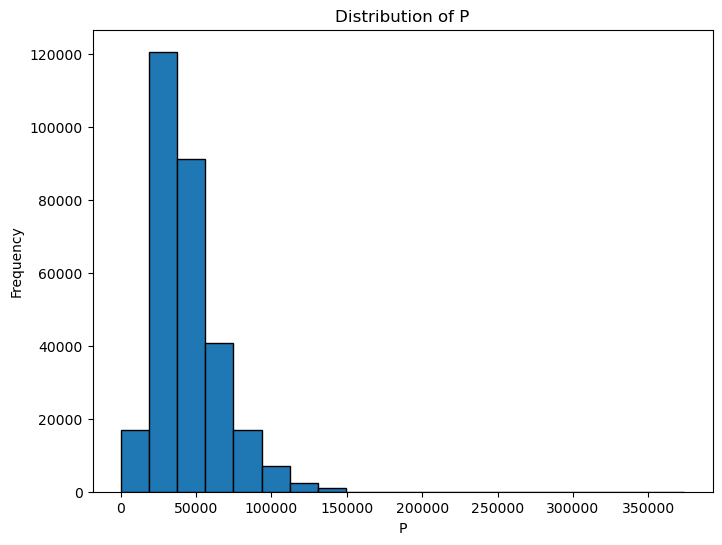

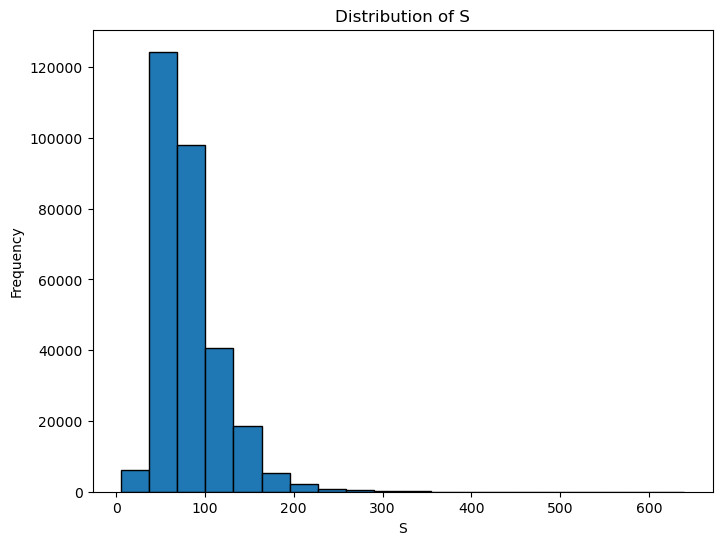

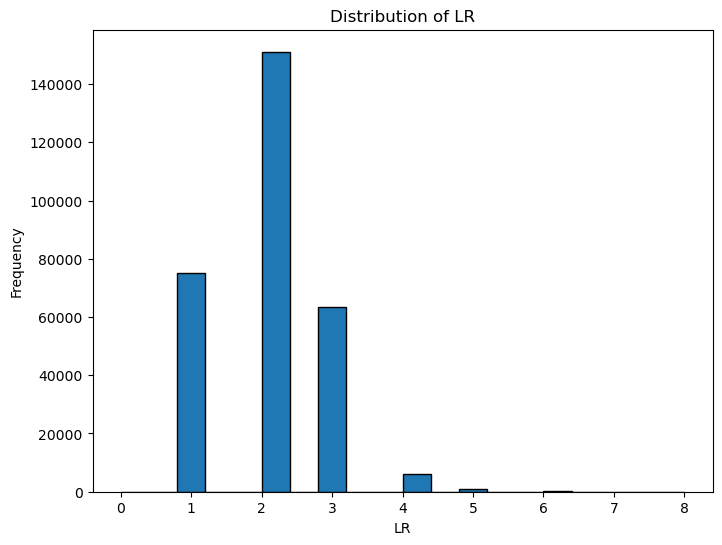

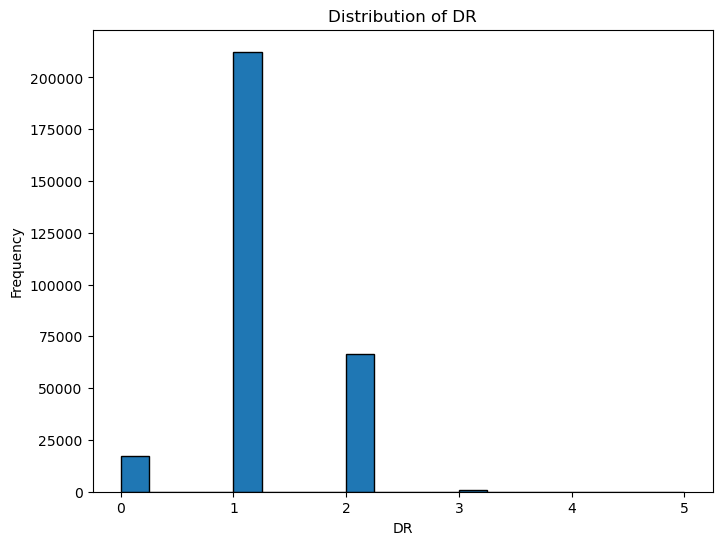

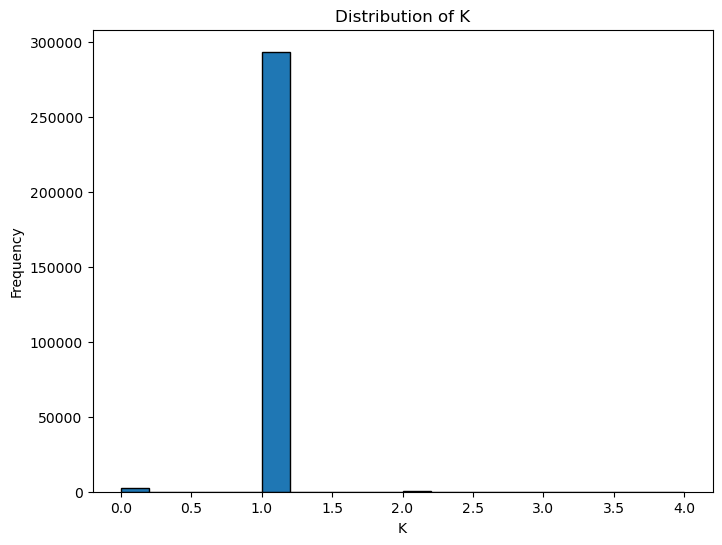

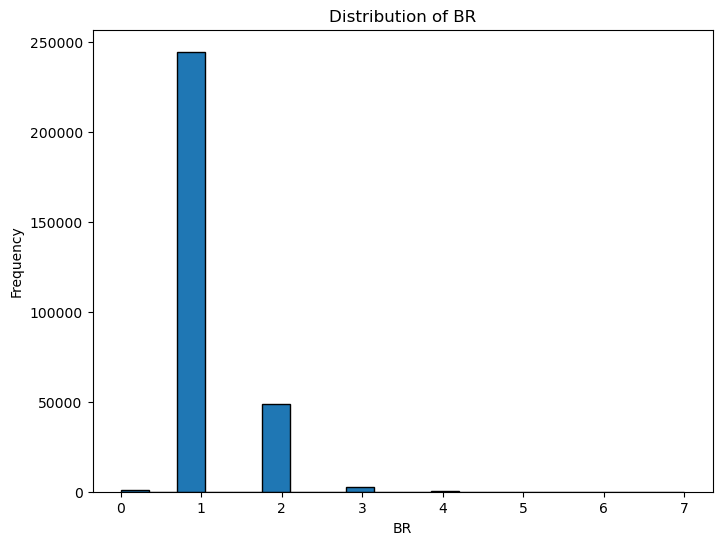

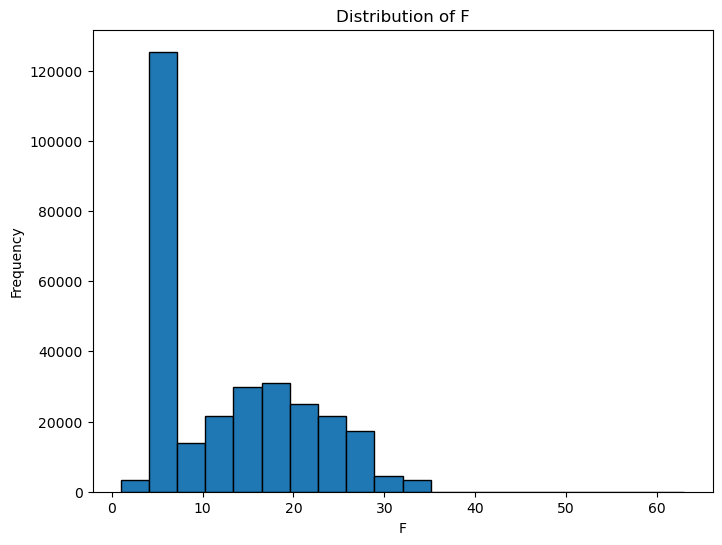

In [44]:
columns = ['P', 'S', 'LR', 'DR', 'K', 'BR', 'F']
df=pd.read_csv("BDAdata_u.csv")
for column in columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='black')  # Use plt.hist for individual columns
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Correlation Analysis

In [45]:
correlation_matrix=df.corr()
correlation_matrix

,L,La,TP,P,S,LR,DR,K,BR,F,BT,CT,RC,BS,LRa,E,YP,Sub,D
L,1.000000,-0.891040,-0.035745,-0.043625,-0.006436,-0.000955,-0.021261,-0.153199,-0.022727,-0.016931,0.002144,-0.002901,0.001031,0.011264,0.000020,-0.015472,0.005105,0.000864,0.009917
La,-0.891040,1.000000,0.018935,-0.004828,0.044932,0.023330,0.045013,0.132597,0.052893,0.001180,0.024859,0.048444,-0.000412,-0.037060,-0.000357,-0.001787,-0.014333,-0.029349,0.020364
TP,-0.035745,0.018935,1.000000,0.642035,0.559017,0.426281,0.314764,0.088466,0.430528,0.168728,-0.063960,0.123675,0.260397,0.196662,-0.001142,0.210369,-0.009681,0.116651,0.012263
P,-0.043625,-0.004828,0.642035,1.000000,-0.168514,-0.074778,-0.127924,0.036051,-0.079697,0.028903,-0.054130,-0.209899,0.298389,0.045450,0.001100,0.053237,0.006204,0.230129,0.037150
S,-0.006436,0.044932,0.559017,-0.168514,1.000000,0.719772,0.616219,0.081183,0.731120,0.162782,-0.014696,0.368895,0.032566,0.164846,-0.002557,0.193004,-0.020460,-0.095143,-0.006876
LR,-0.000955,0.023330,0.426281,-0.074778,0.719772,1.000000,0.475756,0.092409,0.538370,-0.084257,0.118230,-0.000304,0.008197,-0.061963,-0.003435,-0.065872,0.043113,-0.059500,0.017571
DR,-0.021261,0.045013,0.314764,-0.127924,0.616219,0.475756,1.000000,0.125057,0.521981,0.036720,0.073911,0.213596,-0.010510,0.057986,-0.000871,0.058077,0.004545,-0.094516,0.011064
K,-0.153199,0.132597,0.088466,0.036051,0.081183,0.092409,0.125057,1.000000,0.108585,-0.010040,0.016658,-0.019157,-0.007832,-0.010669,0.000131,-0.005623,0.045527,0.016051,-0.044473
BR,-0.022727,0.052893,0.430528,-0.079697,0.731120,0.538370,0.521981,0.108585,1.000000,0.072835,0.030571,0.256930,0.025261,0.119449,-0.001119,0.132863,-0.032653,-0.061652,-0.001188
F,-0.016931,0.001180,0.168728,0.028903,0.162782,-0.084257,0.036720,-0.010040,0.072835,1.000000,-0.734511,0.413528,0.048447,0.678994,-0.000052,0.781166,-0.101123,0.121310,-0.073631


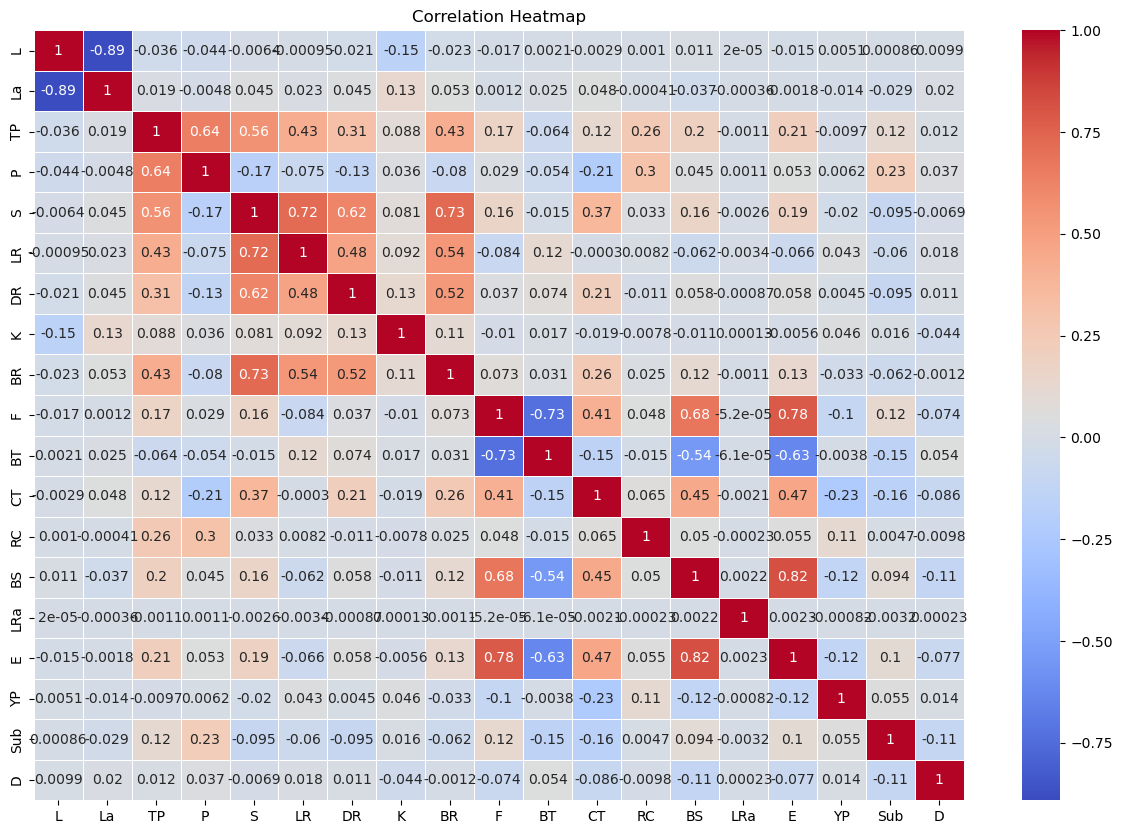

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Attributes Analysis (count plots)

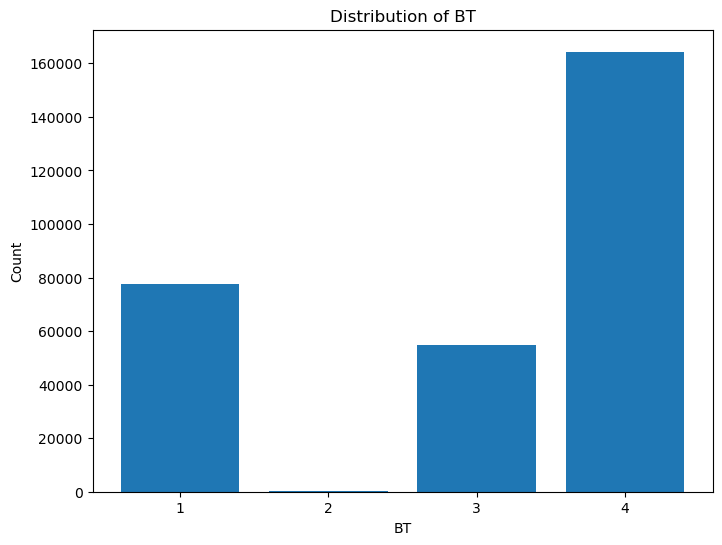

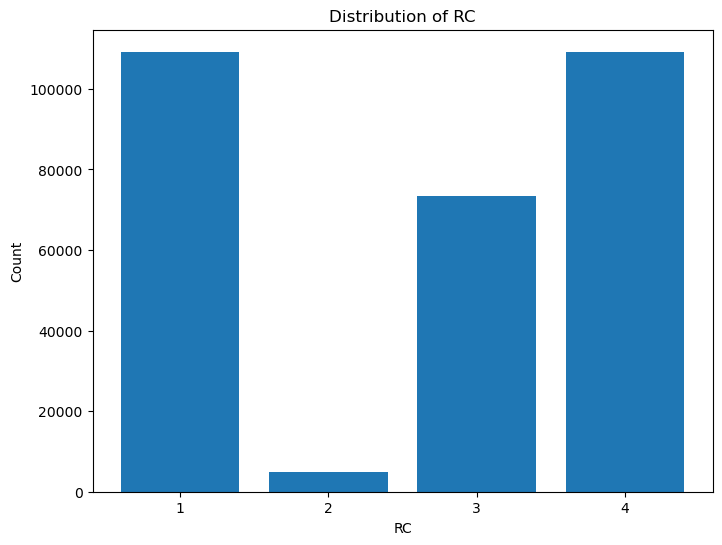

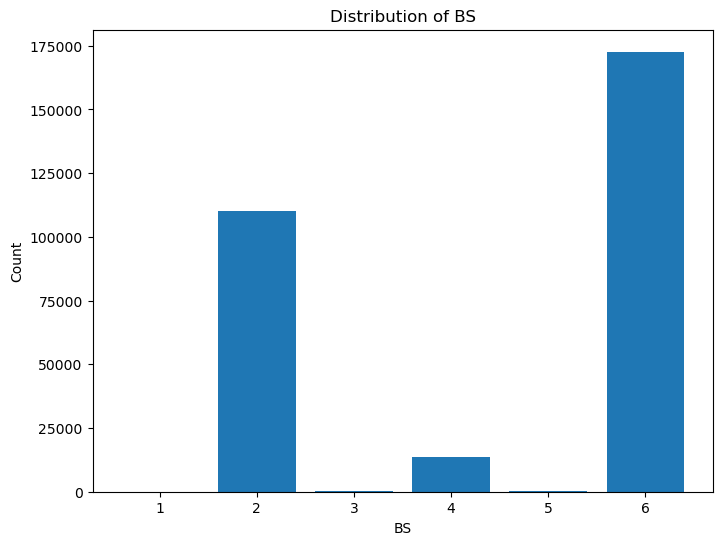

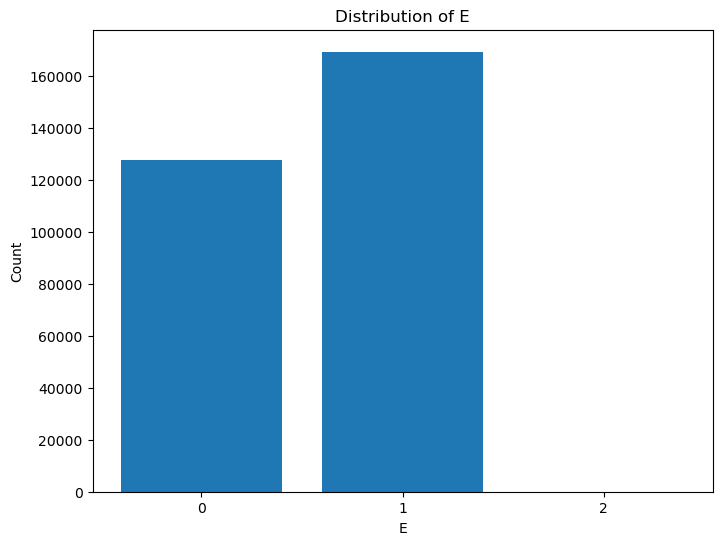

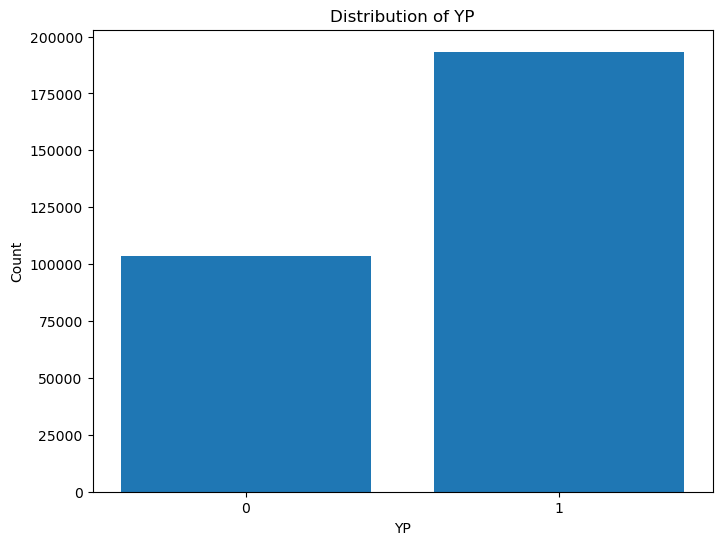

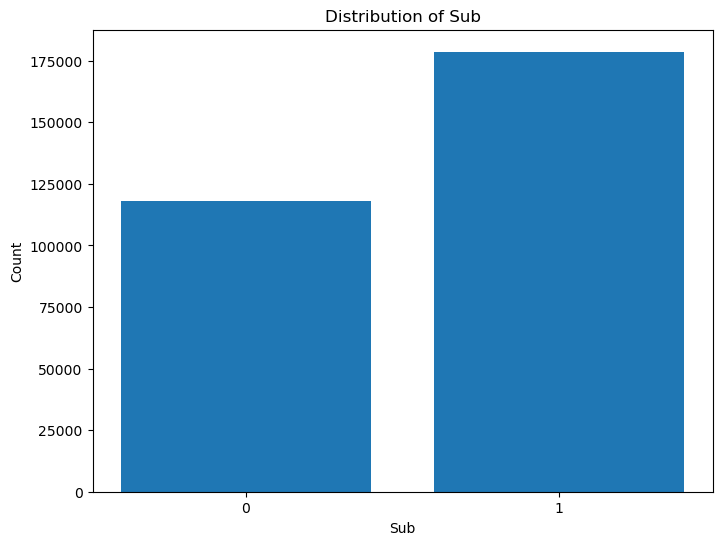

In [47]:
categorical_columns = ['BT', 'RC', 'BS', 'E', 'YP', 'Sub']

for column in categorical_columns:
    value_counts = df1.groupBy(column).count().orderBy(column)
    value_counts_pd = value_counts.toPandas()

    plt.figure(figsize=(8, 6))
    plt.bar(value_counts_pd[column], value_counts_pd['count'])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Data Visualization

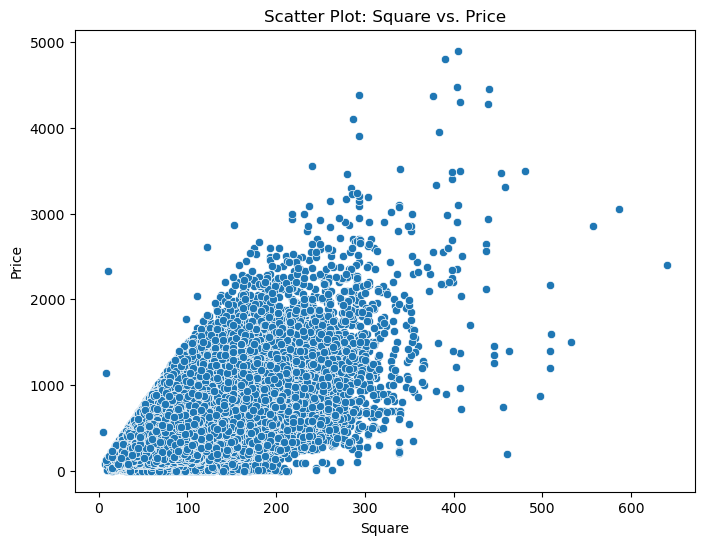

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='S', y='TP')
plt.title('Scatter Plot: Square vs. Price')
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

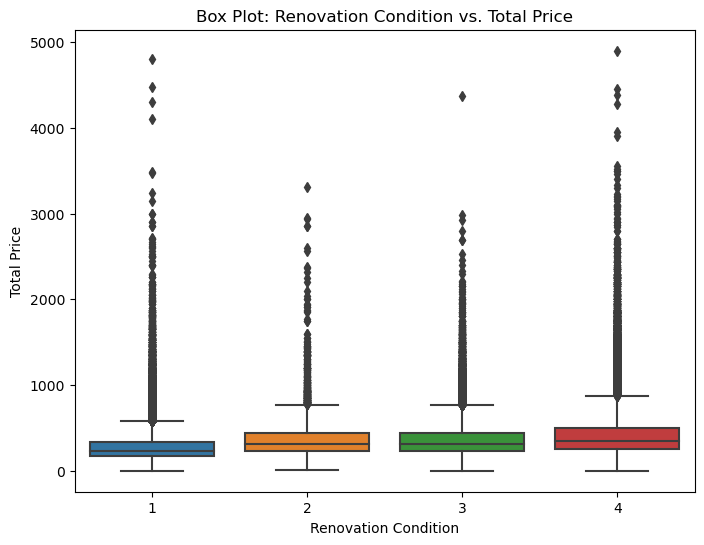

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RC', y='TP')
plt.title('Box Plot: Renovation Condition vs. Total Price')
plt.xlabel('Renovation Condition')
plt.ylabel('Total Price')
plt.show()

# Outlier Analysis

In [50]:
for f in ['TP', 'P', 'S', 'LR', 'DR', 'K', 'BR', 'F','CT','LRa']:
    q1 = pdf[f].quantile(0.25)
    q3 = pdf[f].quantile(0.75)
    iqr = q3-q1

    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr

    outliers=pdf[(pdf[f]>upper_bound)|(pdf[f]<lower_bound)]
    print(f,': ',outliers[f].count() ,' outliers')

TP :  14084  outliers
P :  10772  outliers
S :  10345  outliers
LR :  7016  outliers
DR :  84347  outliers
K :  3124  outliers
BR :  52309  outliers
F :  36  outliers
CT :  2309  outliers
LRa :  6424  outliers


In [51]:
for f in ['TP', 'P', 'S', 'LR', 'DR', 'K', 'BR', 'F','CT','LRa']:
    q1 = pdf[f].quantile(0.25)
    q3 = pdf[f].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    pdf = pdf.loc[(pdf[f] >= lower_bound) & (pdf[f] <= upper_bound)]
    
    pdf.to_csv("BDAdata_u1.csv", index=False)
df1 = spark.read.csv('BDAdata_u1.csv',header=True)
num_rows = df1.count()
print(f"Number of Rows: {num_rows}")

Number of Rows: 182074


# Model Implementation

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

target_column = 'P' 
feature_columns = ['L', 'La', 'TP', 'S', 'LR', 'DR', 'K', 'BR', 'F', 'BT', 'CT', 'RC', 'BS', 'LRa', 'E', 'YP', 'Sub', 'D']

X = pdf[feature_columns]
y = pdf[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2_value = r2_score(y_test, predictions)
print(f'R-squared value: {r2_value}')

with open('linear_regression_model.sav', 'wb') as file:
    pickle.dump(model, file)

R-squared value: 0.9370622648059799
